In [1]:
#-----------------ANN(Automatic Neural Network) ------------------------
# part of deep Learning
# ANN do the optimization automatically
# DATASET USED: weight-height(DeepLearning_1).csv
#-------------------------------------------

from keras.models import Sequential

Using TensorFlow backend.


In [2]:
model = Sequential()

In [3]:
from keras.layers import Dense

# -------------------------------------
# units: y
# input_shape: x
# add hidden layer: Dense
# Dense: as its core do Linear
# -------------------------------------

model.add(Dense(units=1, input_shape=(1,)))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

# optimizer: change the value
from keras.optimizers import Adam, SGD
model.compile(optimizer = Adam(lr = 0.8), loss = "mean_squared_error")  # --> to intigrate all layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


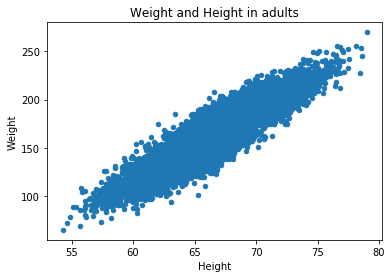

In [17]:
# --------------------
# loading dataset
# --------------------

import pandas as pd
df = pd.read_csv("weight-height(DeepLearning_1).csv")
y = df['Weight'].values
X = df[['Height']].values

# --------------------------------------------------------------------
# pandas function to plot graphs  --> data_frame.plot(kind= ' ', x= ' ', y=' ')
# --------------------------------------------------------------------

df.plot(kind = 'Scatter', x = 'Height', y = 'Weight', title = 'Weight and Height in adults')

In [18]:
# epochs here means no of times we want to train our model for each data in dataset
model.fit(X, y, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 2s 158us/step - loss: 173.4222
Epoch 2/40
10000/10000 [==============================] - 1s 148us/step - loss: 176.4626
Epoch 3/40
10000/10000 [==============================] - 2s 158us/step - loss: 173.5944
Epoch 4/40
10000/10000 [==============================] - 2s 151us/step - loss: 173.3468
Epoch 5/40
10000/10000 [==============================] - 1s 150us/step - loss: 204.4596
Epoch 6/40
10000/10000 [==============================] - 2s 156us/step - loss: 177.2283
Epoch 7/40
10000/10000 [==============================] - 2s 172us/step - loss: 181.0262
Epoch 8/40
10000/10000 [==============================] - 2s 170us/step - loss: 170.9765
Epoch 9/40
10000/10000 [==============================] - 2s 173us/step - loss: 172.9893
Epoch 10/40
10000/10000 [==============================] - 2s 171us/step - loss: 184.5808
Epoch 11/40
10000/10000 [==============================] - 2s 181us/step - loss: 178.0994
Epoch 12/40
10000/1

In [21]:
y_pred = model.predict(X)

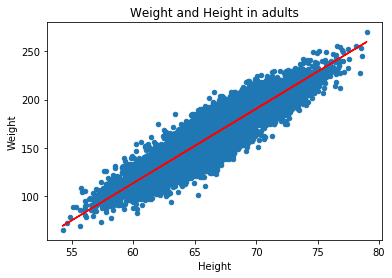

In [22]:
# --------------------------------------------------------
# visualizing the best fit curve after training my model
# --------------------------------------------------------

import  matplotlib.pyplot  as plt

df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [23]:
W, B = model.get_weights()

In [24]:
W

array([[7.728605]], dtype=float32)

In [25]:
B

array([-350.55264], dtype=float32)

In [27]:
# -------------------------------
# Evaluating Model Performance
# -------------------------------

from sklearn.metrics import r2_score
print("The R2 score is {:0.3f}".format(r2_score(y, y_pred)))


The R2 score is 0.854


In [28]:
#------------------------------------------------
# spliting dataset into train and test dataset
#------------------------------------------------

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# ----------------------------------------------
# reset the weight to again train, detraining 
# ----------------------------------------------

W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [30]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [31]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [32]:
# -------------------------------------------------------------------
# Checking the performance of your trained model by calculating MSE
# -------------------------------------------------------------------


from sklearn.metrics import mean_squared_error as mse

print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	168.6
The Mean Squared Error on the Test set is:	170.8


In [33]:
# --------------------
# Checking R2 Score
# --------------------

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.836
The R2 score on the Test set is:	0.837


In [34]:
# The Model is Trained very good as the R2 score is almost same